# SalishSeaCast Domain + Ariane CS plot
based on Ben's code from https://github.com/SalishSeaCast/analysis-ben/blob/master/notebooks/Maps.ipynb

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.io import loadmat
from cmocean import cm
import warnings
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools, geo_tools

# import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

# line p stuff
import re
import pandas as pd

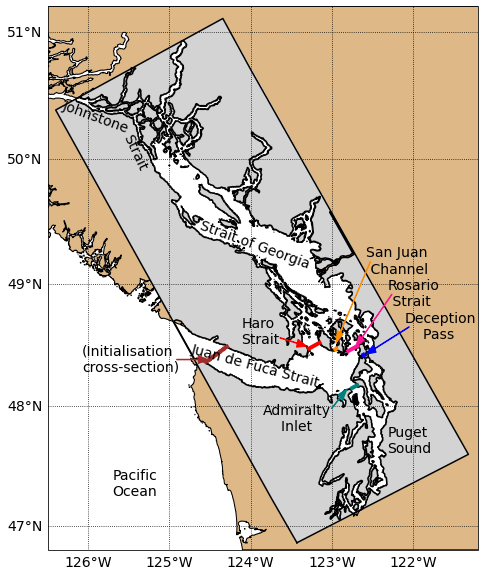

In [2]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/ocean/rbeutel/MEOPAR/grid/mesh_mask201702.nc')

# Make plot area
xlim, ylim = [-126.5, -121.2], [46.8, 51.2]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

# Overlay domain landmask and coastline
ax.contourf(grid.nav_lon, grid.nav_lat,mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',transform=crs.PlateCarree(), zorder =2)
ax.contour(grid.nav_lon, grid.nav_lat,mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',transform=crs.PlateCarree(), zorder=2)

# Draw box around domain
lons, lats = [], []
corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Add cross-sections
a = [grid.nav_lon[204,255],grid.nav_lon[204,267],grid.nav_lat[204,255],grid.nav_lat[204,267]]
d = [grid.nav_lon[246,309],grid.nav_lon[247,309],grid.nav_lat[246,309],grid.nav_lat[247,309]]
r = [grid.nav_lon[266,286],grid.nav_lon[266,307],grid.nav_lat[266,286],grid.nav_lat[266,307]]
s = [grid.nav_lon[280,264],grid.nav_lon[280,266],grid.nav_lat[280,264],grid.nav_lat[280,266]]
h = [grid.nav_lon[304,218],grid.nav_lon[304,242],grid.nav_lat[304,218],grid.nav_lat[304,242]]
ax.plot([a[0],a[1]],[a[2],a[3]],zorder=11,transform=crs.PlateCarree(),lw=4,c='teal')
ax.plot([d[0],d[1]],[d[2],d[3]],zorder=11,transform=crs.PlateCarree(),lw=4,c='b')
ax.plot([r[0],r[1]],[r[2],r[3]],zorder=11,transform=crs.PlateCarree(),lw=4,c='deeppink')
ax.plot([s[0],s[1]],[s[2],s[3]],zorder=11,transform=crs.PlateCarree(),lw=4,c='darkorange')
ax.plot([h[0],h[1]],[h[2],h[3]],zorder=11,transform=crs.PlateCarree(),lw=4,c='r')

# Add annoying JDF CS
nums = [[374,18],[374,27],[375,27],[375,36],[376,36],[376,45],[377,45],[377,54],[378,54],[378,63],[379,63],[379,71]]
jr_lat = [grid.nav_lat[i[0],i[1]] for i in nums]
jr_lon = [grid.nav_lon[i[0],i[1]] for i in nums]
ax.plot(jr_lon, jr_lat,zorder=11,transform=crs.PlateCarree(),lw=4,c='brown')

# Add annotations
ax.text(0.15, 0.1, 'Pacific\nOcean', transform=ax.transAxes)
ax.text(0.79, 0.18, 'Puget\nSound', transform=ax.transAxes)
ax.text(0.33, 0.30, 'Juan de Fuca Strait', transform=ax.transAxes, rotation=-15,zorder = 11)
ax.text(0.35, 0.52, 'Strait of Georgia', transform=ax.transAxes, rotation=-20)
ax.text(0.03, 0.77, 'Johnstone', transform=ax.transAxes, rotation=-20)
ax.text(0.17, 0.70, 'Strait', transform=ax.transAxes, rotation=-65)
ax.text(0.45, 0.38, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.50, 0.22, 'Admiralty\n    Inlet', transform=ax.transAxes)
ax.text(0.79, 0.45, 'Rosario\n Strait', transform=ax.transAxes)
ax.text(0.83, 0.39, 'Deception\n    Pass', transform=ax.transAxes)
ax.text(0.74, 0.51, 'San Juan\n Channel', transform=ax.transAxes)
ax.text(0.08,0.33,'(Initialisation\ncross-section)', transform=ax.transAxes)
ax.arrow(0.54, 0.39, 0.04, -0.01, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)
ax.arrow(0.75, 0.53, -0.07, -0.13, head_width=0.015, edgecolor='darkorange', facecolor='darkorange', transform=ax.transAxes, zorder=10)
ax.arrow(0.80, 0.47, -0.07, -0.08, head_width=0.015, edgecolor='deeppink', facecolor='deeppink', transform=ax.transAxes, zorder=10)
ax.arrow(0.84, 0.41, -0.08, -0.04, head_width=0.015, edgecolor='b', facecolor='b', transform=ax.transAxes, zorder=10)
ax.arrow(0.66, 0.26, 0.02, 0.02, head_width=0.015, edgecolor='teal', facecolor='teal', transform=ax.transAxes, zorder=10)
ax.arrow(0.3,0.35,0.05,0, head_width=0.015, edgecolor='brown', facecolor='brown', transform=ax.transAxes, zorder=10)


In [3]:
# for thesis i think best to zoom in more on study area for showing the ariance cross-sections
# i will have a plot earlier of the whole salish sea



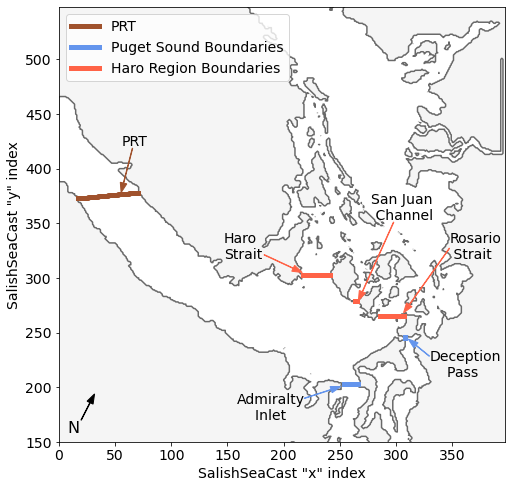

In [4]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
# grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgray')
ax.set_ylim([150,548])

# Add cross-sections
ax.plot([17,26,26,26,26,35,35,35,35,44,44,44,44,53,53,53,53,62,62,62,62,70],[373,373,373,374,374,374,374,375,375,375,375,376,376,376,376,377,377,377,377,378,378,378], lw=5, c='sienna', label = "PRT")
ax.plot([254,266],[203,203], lw=5, c='cornflowerblue', label = "Puget Sound Boundaries")
ax.plot([308,308],[245,246], lw=5, c='cornflowerblue')
ax.plot([286,307],[265,265], lw=5, c='tomato', label = "Haro Region Boundaries")
ax.plot([263,265],[279,279], lw=5, c='tomato')
ax.plot([217,241],[303,303], lw=5, c ='tomato')
ax.legend(loc='upper left')
ax.set_ylabel('SalishSeaCast "y" index')
ax.set_xlabel('SalishSeaCast "x" index')

ax.text(0.37, 0.42, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.4, 0.05, 'Admiralty\n    Inlet', transform=ax.transAxes)
ax.text(0.875, 0.42, 'Rosario\n Strait', transform=ax.transAxes)
ax.text(0.83, 0.15, 'Deception\n    Pass', transform=ax.transAxes)
ax.text(0.7, 0.51, 'San Juan\n Channel', transform=ax.transAxes)
ax.text(0.14,0.68,'PRT', transform=ax.transAxes)
ax.arrow(0.46, 0.43, 0.065, -0.031, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.75, 0.505, -0.07, -0.16, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.875, 0.445, -0.09, -0.13, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.83, 0.197, -0.03, 0.025, head_width=0.015, edgecolor='cornflowerblue', facecolor='cornflowerblue', transform=ax.transAxes, zorder=10)
ax.arrow(0.55, 0.1, 0.06, 0.02, head_width=0.015, edgecolor='cornflowerblue', facecolor='cornflowerblue', transform=ax.transAxes, zorder=10)
ax.arrow(0.165,0.675,-0.02,-0.08, head_width=0.015, edgecolor='sienna', facecolor='sienna', transform=ax.transAxes, zorder=10)

ax.arrow(0.05, 0.05, 0.02, 0.04, head_width=0.015, edgecolor='black', facecolor='black', transform=ax.transAxes, zorder=10)
ax.text(0.02, 0.02, 'N', transform=ax.transAxes, fontsize=16)


plt.savefig("./figures/SSCboundaries.pdf")

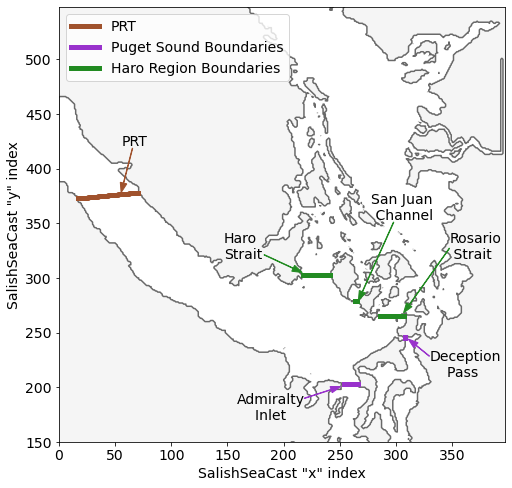

In [5]:
# same as above but colouring for defence

# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
# grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgray')
ax.set_ylim([150,548])

# Add cross-sections
ax.plot([17,26,26,26,26,35,35,35,35,44,44,44,44,53,53,53,53,62,62,62,62,70],[373,373,373,374,374,374,374,375,375,375,375,376,376,376,376,377,377,377,377,378,378,378], lw=5, c='sienna', label = "PRT")
ax.plot([254,266],[203,203], lw=5, c='darkorchid', label = "Puget Sound Boundaries")
ax.plot([308,308],[245,246], lw=5, c='darkorchid')
ax.plot([286,307],[265,265], lw=5, c='forestgreen', label = "Haro Region Boundaries")
ax.plot([263,265],[279,279], lw=5, c='forestgreen')
ax.plot([217,241],[303,303], lw=5, c ='forestgreen')
ax.legend(loc='upper left')
ax.set_ylabel('SalishSeaCast "y" index')
ax.set_xlabel('SalishSeaCast "x" index')

ax.text(0.37, 0.42, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.4, 0.05, 'Admiralty\n    Inlet', transform=ax.transAxes)
ax.text(0.875, 0.42, 'Rosario\n Strait', transform=ax.transAxes)
ax.text(0.83, 0.15, 'Deception\n    Pass', transform=ax.transAxes)
ax.text(0.7, 0.51, 'San Juan\n Channel', transform=ax.transAxes)
ax.text(0.14,0.68,'PRT', transform=ax.transAxes)
ax.arrow(0.46, 0.43, 0.065, -0.031, head_width=0.015, edgecolor='forestgreen', facecolor='forestgreen', transform=ax.transAxes, zorder=10)
ax.arrow(0.75, 0.505, -0.07, -0.16, head_width=0.015, edgecolor='forestgreen', facecolor='forestgreen', transform=ax.transAxes, zorder=10)
ax.arrow(0.875, 0.445, -0.09, -0.13, head_width=0.015, edgecolor='forestgreen', facecolor='forestgreen', transform=ax.transAxes, zorder=10)
ax.arrow(0.83, 0.197, -0.03, 0.025, head_width=0.015, edgecolor='darkorchid', facecolor='darkorchid', transform=ax.transAxes, zorder=10)
ax.arrow(0.55, 0.1, 0.06, 0.02, head_width=0.015, edgecolor='darkorchid', facecolor='darkorchid', transform=ax.transAxes, zorder=10)
ax.arrow(0.165,0.675,-0.02,-0.08, head_width=0.015, edgecolor='sienna', facecolor='sienna', transform=ax.transAxes, zorder=10)

plt.savefig("./figures/SSCboundaries_defence.pdf")

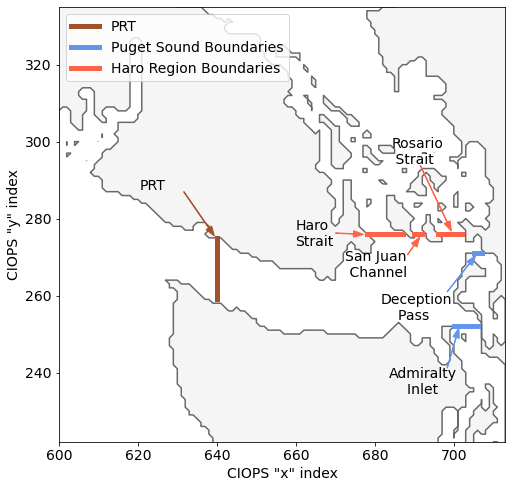

In [6]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgrey')
ax.set_ylim([222,335])
ax.set_xlim([600,713])

# Add cross-sections
ax.plot([640,640],[259,275], lw=5, c='sienna', label = "PRT")
ax.plot([700,706],[252,252], lw=5, c='cornflowerblue', label = "Puget Sound Boundaries")
ax.plot([705,707],[271,271], lw=5, c='cornflowerblue')
ax.plot([696,702],[276,276], lw=5, c='tomato', label = "Haro Region Boundaries")
ax.plot([690,692],[276,276], lw=5, c='tomato')
ax.plot([678,687],[276,276], lw=5, c ='tomato')
ax.legend(loc='upper left')
ax.set_ylabel('CIOPS "y" index')
ax.set_xlabel('CIOPS "x" index')

ax.text(0.53, 0.45, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.74, 0.11, 'Admiralty\n    Inlet', transform=ax.transAxes)
ax.text(0.745, 0.64, 'Rosario\n Strait', transform=ax.transAxes)
ax.text(0.72, 0.28, 'Deception\n    Pass', transform=ax.transAxes)
ax.text(0.64, 0.38, 'San Juan\n Channel', transform=ax.transAxes)
ax.text(0.18,0.58,'PRT', transform=ax.transAxes)
ax.arrow(0.62, 0.48, 0.04, -0.002, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.81, 0.635, 0.06, -0.13, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.781, 0.43, 0.015, 0.022, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.87, 0.345, 0.05, 0.065, head_width=0.015, edgecolor='cornflowerblue', facecolor='cornflowerblue', transform=ax.transAxes, zorder=10)
ax.arrow(0.87, 0.17, 0.02, 0.07, head_width=0.015, edgecolor='cornflowerblue', facecolor='cornflowerblue', transform=ax.transAxes, zorder=10)
ax.arrow(0.28,0.575,0.056,-0.083, head_width=0.015, edgecolor='sienna', facecolor='sienna', transform=ax.transAxes, zorder=10)


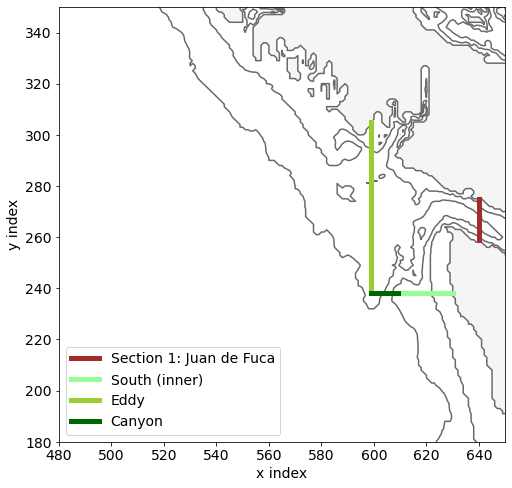

In [7]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgrey')
ax.set_ylim([180,350])
ax.set_xlim([480,650])
ax.set_ylabel('y index')
ax.set_xlabel('x index')

c = ax.contour(mesh.mbathy[0,:,:]*10, levels=[200,300],extend='max', colors='dimgrey')
ax.clabel(c, inline=1, fontsize=100)

# Add cross-sections
# inner (susan):
ax.plot([640,640],[259,275], lw=5, c='brown', label = "Section 1: Juan de Fuca")
ax.plot([609,630],[238,238], 'palegreen',linewidth=5, label='South (inner)')
ax.plot([599,599],[238,305], 'yellowgreen',linewidth=5, label='Eddy')
ax.plot([609,599],[238,238], 'darkgreen',linewidth=5, label='Canyon')
ax.legend(loc='lower left')

In [2]:
def ddm2dec(dms_str):
    """Return decimal representation of DDM (degree decimal minutes)
    
    >>> ddm2dec("45° 17,896' N")
    48.8866111111F
    """
    
    dms_str = re.sub(r'\s', '', dms_str)
    
    sign = -1 if re.search('[swSW]', dms_str) else 1
    
    numbers = [*filter(len, re.split('\D+', dms_str, maxsplit=4))]

    degree = numbers[0]
    minute_decimal = numbers[1] 
    decimal_val = numbers[2] if len(numbers) > 2 else '0' 
    minute_decimal += "." + decimal_val

    return sign * (int(degree) + float(minute_decimal) / 60)

In [3]:
P = pd.read_csv('lineP.txt', delim_whitespace=True)
P['lat_dec'] = np.array([ddm2dec(P.lat.astype(np.str)[i]) for i in range(len(P.lat))])
P['lon_dec'] = np.array([ddm2dec(P.lon.astype(np.str)[i])*-1 for i in range(len(P.lat))])

In [4]:
def haversine(lon1, lat1, lon2, lat2):
    """Calculate the great-circle distance in kilometers between two points
    on a sphere from their longitudes and latitudes.
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km


def closest_point(lon,lat,model_lons,model_lats):
    tols={'tol_lon': 0.02, 'tol_lat': 0.01}
        # Search for a grid point with longitude and latitude within
        # tolerance of measured location
    j_list, i_list = np.where(
        np.logical_and(
            (np.logical_and(model_lons > lon - tols['tol_lon'],
                            model_lons < lon + tols['tol_lon'])),
            (np.logical_and(model_lats > lat - tols['tol_lat'],
                            model_lats < lat + tols['tol_lat']))
        )
    )

    if len(j_list) == 0:
        j,i = np.nan, np.nan
    elif len(j_list) == 1:
        j, i = j_list.item(0), i_list.item(0)
    else:
            # Several points within tolerance
            # Calculate distances for all and choose the closest

            # Avoiding array indexing because some functions
            # pass in model_lons and model_lats as netcdf4 objects
            # (which treat 'model_lons[j_list, i_list]' differently)
        lons = [model_lons[j_list[n], i_list[n]] for n in range(len(j_list))]
        lats = [model_lats[j_list[n], i_list[n]] for n in range(len(j_list))]
        dists = haversine(
            np.array([lon] * i_list.size), np.array([lat] * j_list.size),
            lons, lats)
        n = dists.argmin()
        j, i = j_list.item(n), i_list.item(n)
    
    return j,i

In [5]:
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
P['x'] = np.array([closest_point(P.lon_dec[i],P.lat_dec[i],mesh.nav_lon,mesh.nav_lat)[1] for i in range(len(P.lat))])
P['y'] = np.array([closest_point(P.lon_dec[i],P.lat_dec[i],mesh.nav_lon,mesh.nav_lat)[0] for i in range(len(P.lat))])

In [6]:
P.head()

,station,lat,lon,depth,instruments,lat_dec,lon_dec,x,y
0,P1,48°34.5,125°30.0,120,CTD,48.575000,-125.500000,597.0,275.0
1,P2,48°36.0,126°00.0,114,Rosette/Bongo,48.600000,-126.000000,579.0,275.0
2,P3,48°37.5,126°20.0,750,CTD,48.625000,-126.333333,566.0,275.0
3,P4,48°39.0,126°40.0,1300,Rosette/Bongo,48.650000,-126.666667,554.0,276.0
4,P5,48°41.5,127°10.0,2100,CTD,48.691667,-127.166667,535.0,277.0


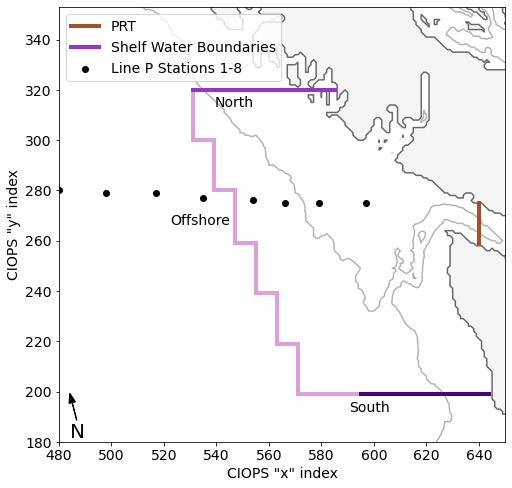

In [7]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgrey')
ax.set_ylim([180,353])
ax.set_xlim([480,650])
ax.set_ylabel('CIOPS "y" index')
ax.set_xlabel('CIOPS "x" index')

c = ax.contour(mesh.mbathy[0,:,:]*10, levels=[300],extend='max', colors='dimgrey', alpha=0.5)
ax.clabel(c, inline=1, fontsize=100)

# Add cross-sections
# outer (saurav):
ax.plot([640,640],[259,275], lw=4, c='sienna', label = "PRT")
ax.plot([531,531],[319,300], 'plum',linewidth=4)#, label='Offshore')
ax.plot([531,539],[300,300], 'plum',linewidth=4)
ax.plot([539,539],[300,280], 'plum',linewidth=4)
ax.plot([539,547],[280,280], 'plum',linewidth=4)
ax.plot([547,547],[280,259], 'plum',linewidth=4)
ax.plot([547,555],[259,259], 'plum',linewidth=4)
ax.plot([555,555],[259,239], 'plum',linewidth=4)
ax.plot([563,555],[239,239], 'plum',linewidth=4)
ax.plot([563,563],[239,219], 'plum',linewidth=4)
ax.plot([563,571],[219,219], 'plum',linewidth=4)
ax.plot([571,571],[219,199], 'plum',linewidth=4)
ax.plot([571,594],[199,199], 'plum',linewidth=4)
ax.plot([531,585],[320,320], 'darkorchid',linewidth=4, label='Shelf Water Boundaries')
ax.plot([595,644],[199,199], 'indigo',linewidth=4)#, label='South (outer)')

# # ax.plot([640,640],[259,275], lw=5, c='brown', label = "Section 1: Juan de Fuca")
# ax.plot([609,630],[238,238], '#c2e699',linewidth=5)#, label='South (inner)')
# ax.plot([599,599],[238,305], '#74c476',linewidth=5, label='Eddy Influence Boundaries')
# ax.plot([609,599],[238,238], '#006837',linewidth=5)#, label='Canyon')

# add line P stations
ax.scatter(P.x,P.y,color='k',label='Line P Stations 1-8')

ax.text(0.35, 0.77, 'North', transform=ax.transAxes)
ax.text(0.25, 0.5, 'Offshore', transform=ax.transAxes)
ax.text(0.65, 0.07, 'South', transform=ax.transAxes)
# ax.text(0.78, 0.345, 'South', transform=ax.transAxes)
# ax.text(0.65, 0.3, 'Canyon', transform=ax.transAxes)
# ax.text(0.61,0.5,'Eddy', transform=ax.transAxes)

ax.arrow(0.04, 0.05, -0.01, 0.04, head_width=0.015, edgecolor='black', facecolor='black', transform=ax.transAxes, zorder=10)
ax.text(0.025, 0.01, 'N', transform=ax.transAxes, fontsize=20)

ax.legend(loc='upper left')
plt.savefig("./figures/shelfBDYs.pdf")

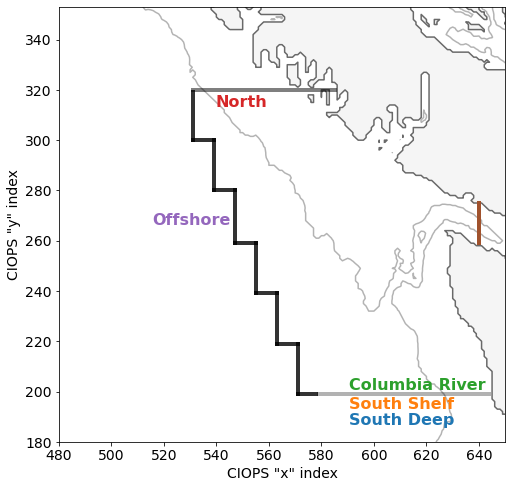

In [18]:
# Above but only outer and colouring for defence

# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgrey')
ax.set_ylim([180,353])
ax.set_xlim([480,650])
ax.set_ylabel('CIOPS "y" index')
ax.set_xlabel('CIOPS "x" index')

c = ax.contour(mesh.mbathy[0,:,:]*10, levels=[300],extend='max', colors='dimgrey', alpha=0.5)
ax.clabel(c, inline=1, fontsize=100)

# Add cross-sections
# outer (saurav):
ax.plot([640,640],[259,275], lw=4, c='sienna', label = "PRT")
ax.plot([531,531],[319,300], 'black',alpha=0.8,linewidth=4)#, label='Offshore')
ax.plot([531,539],[300,300], 'black',alpha=0.8,linewidth=4)
ax.plot([539,539],[300,280], 'black',alpha=0.8,linewidth=4)
ax.plot([539,547],[280,280], 'black',alpha=0.8,linewidth=4)
ax.plot([547,547],[280,259], 'black',alpha=0.8,linewidth=4)
ax.plot([547,555],[259,259], 'black',alpha=0.8,linewidth=4)
ax.plot([555,555],[259,239], 'black',alpha=0.8,linewidth=4)
ax.plot([563,555],[239,239], 'black',alpha=0.8,linewidth=4)
ax.plot([563,563],[239,219], 'black',alpha=0.8,linewidth=4)
ax.plot([563,571],[219,219], 'black',alpha=0.8,linewidth=4)
ax.plot([571,571],[219,199], 'black',alpha=0.8,linewidth=4)
ax.plot([571,578],[199,199], 'black',alpha=0.8,linewidth=4)
ax.plot([531,585],[320,320], 'black',alpha=0.5,linewidth=4, label='Shelf Water Boundaries')
ax.plot([579,644],[199,199], 'black',alpha=0.3,linewidth=4)#, label='South (outer)')

ax.text(0.35, 0.77, 'North', c='tab:red', fontsize=16,weight='bold',  transform=ax.transAxes)
ax.text(0.21, 0.5, 'Offshore', c='tab:purple', fontsize=16, weight='bold', transform=ax.transAxes)
ax.text(0.65, 0.075, 'South Shelf', c='tab:orange', fontsize=16, weight='bold', transform=ax.transAxes)
ax.text(0.65, 0.04, 'South Deep', c='tab:blue', fontsize=16, weight='bold', transform=ax.transAxes)
ax.text(0.65, 0.12, 'Columbia River', c='tab:green', fontsize=16, weight='bold', transform=ax.transAxes)

# ax.legend(loc='upper left')
plt.savefig("./figures/shelfBDYs_defence.png")

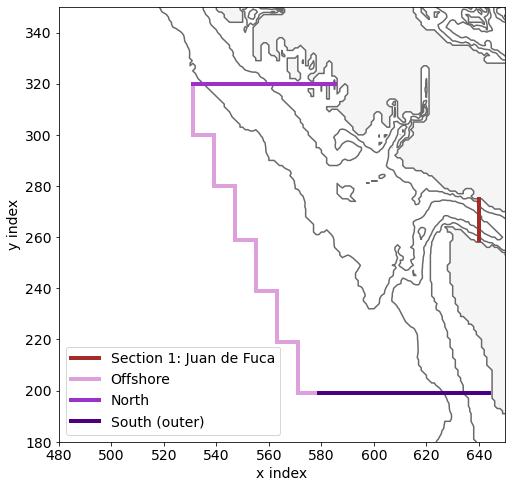

In [19]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgrey')
ax.set_ylim([180,350])
ax.set_xlim([480,650])
ax.set_ylabel('y index')
ax.set_xlabel('x index')

c = ax.contour(mesh.mbathy[0,:,:]*10, levels=[200,300],extend='max', colors='dimgrey')
ax.clabel(c, inline=1, fontsize=100)

# Add cross-sections
# outer (saurav):
ax.plot([640,640],[259,275], lw=4, c='brown', label = "Section 1: Juan de Fuca")

ax.plot([531,531],[319,300], 'plum',linewidth=4, label='Offshore')
ax.plot([531,539],[300,300], 'plum',linewidth=4)
ax.plot([539,539],[300,280], 'plum',linewidth=4)
ax.plot([539,547],[280,280], 'plum',linewidth=4)
ax.plot([547,547],[280,259], 'plum',linewidth=4)
ax.plot([547,555],[259,259], 'plum',linewidth=4)
ax.plot([555,555],[259,239], 'plum',linewidth=4)
ax.plot([563,555],[239,239], 'plum',linewidth=4)
ax.plot([563,563],[239,219], 'plum',linewidth=4)
ax.plot([563,571],[219,219], 'plum',linewidth=4)
ax.plot([571,571],[219,199], 'plum',linewidth=4)
ax.plot([571,578],[199,199], 'plum',linewidth=4)
ax.plot([531,585],[320,320], 'darkorchid',linewidth=4, label='North')
ax.plot([579,644],[199,199], 'indigo',linewidth=4, label='South (outer)')
ax.legend(loc='lower left')

Text(0.5, 0, 'x index')

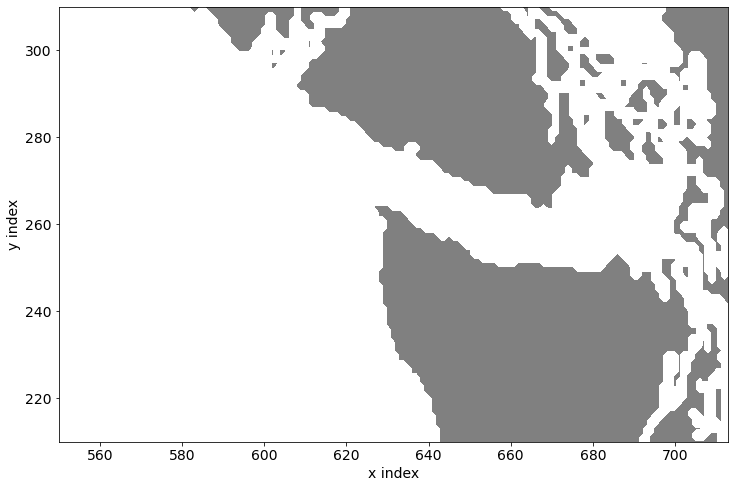

In [20]:
# map for drawing major paths

# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(12, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='grey')
# ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_ylim([210,310])
ax.set_xlim([550,713])
ax.set_ylabel('y index')
ax.set_xlabel('x index')

# c = ax.contour(mesh.mbathy[0,:,:]*10, levels=[200,300],extend='max', colors='dimgrey', alpha=0.5)
# ax.clabel(c, inline=1, fontsize=100)